In [56]:
from IPython.display import clear_output
import time
from scipy.optimize import fsolve
import ot

# Reverse KL Divergence

In [81]:
n, m = 5, 3
eps = 1e-1

In [18]:
C =  np.random.chisquare(2, size=(n,m))
a = np.random.chisquare(2, size=n)
b = np.random.chisquare(2, size=m)
a  /= np.sum(a)
b /= np.sum(b)

In [105]:
K = np.exp(-C/eps)
K /= np.sum(K)

In [118]:
K

array([[  1.13690069e-08,   4.31497133e-15,   4.64746418e-17],
       [  2.27617131e-01,   3.93823097e-05,   2.00425039e-01],
       [  3.75853726e-02,   7.07860997e-08,   1.39412356e-11],
       [  3.43343373e-06,   1.08079800e-04,   5.34113574e-01],
       [  3.59030382e-12,   1.07905835e-04,   7.81009127e-11]])

(array([ 1.,  1.,  0.,  3.,  0.,  2.,  1.,  3.,  0.,  4.]),
 array([-16.33278395, -14.72674219, -13.12070044, -11.51465868,
         -9.90861692,  -8.30257517,  -6.69653341,  -5.09049165,
         -3.4844499 ,  -1.87840814,  -0.27236638]),
 <a list of 10 Patch objects>)

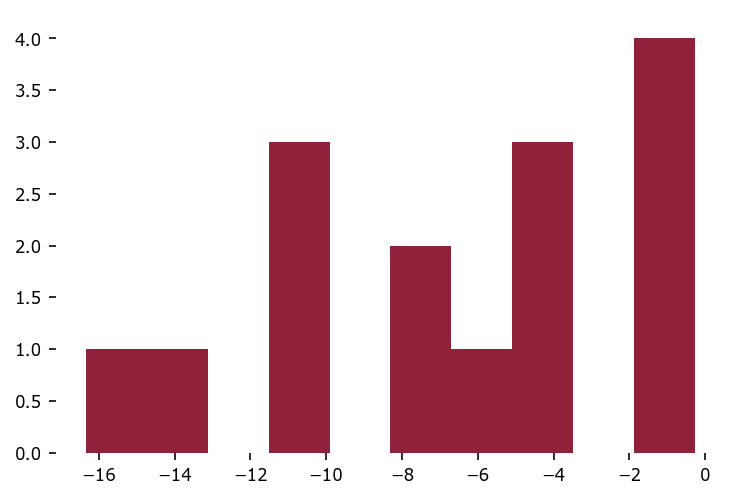

In [121]:
plt.hist(np.log10(K.flatten()))

In [109]:
def get_P(x):
    return K / (x[:n, np.newaxis] + x[-m:])

def f(x):
    res = np.zeros(n+m)
    mat = get_P(x)
    res[:n] =  mat.sum(axis=1) - a
    res[-m:] = mat.sum(axis=0) - b
    return res

In [110]:
def f_jac(x):
    res = np.zeros((n+m,n+m))
    mat = -K / (x[:n, np.newaxis] + x[-m:])**2
    res[range(n), range(n)] = mat.sum(axis=1)
    res[-m:, -m:] = np.diag(mat.sum(axis=0))
    res[:n,-m:] = mat
    res[-m:,:n] = mat.T
    return res

In [122]:
f_jac(x)

array([[ -5.07207341e-09,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -5.07207147e-09,
         -1.92504439e-15,  -2.07337991e-17],
       [  0.00000000e+00,  -1.93310517e-01,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,  -1.02785988e-01,
         -1.77840288e-05,  -9.05067450e-02],
       [  0.00000000e+00,   0.00000000e+00,  -1.70874447e-02,
          0.00000000e+00,   0.00000000e+00,  -1.70874125e-02,
         -3.21814366e-08,  -6.33809450e-12],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         -2.29248458e-01,   0.00000000e+00,  -1.47336658e-06,
         -4.63795657e-05,  -2.29200605e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,  -4.82638974e-05,  -1.60586241e-12,
         -4.82638608e-05,  -3.49327873e-11],
       [ -5.07207147e-09,  -1.02785988e-01,  -1.70874125e-02,
         -1.47336658e-06,  -1.60586241e-12,  -1.19874879e-01,
          0.00000000e+00,   0.0

In [117]:
scipy_x  =  fsolve(f, np.random.randn(n+m)**2, fprime=f_jac)
scipy_x

/anaconda/envs/py36/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([  1.39715259e+24,   1.56717508e+06,   1.56715208e+06,
         1.56717760e+06,   1.54387910e+06,  -1.56717337e+06,
        -1.56747921e+06,  -1.56717449e+06])

In [100]:
f(scipy_x)

array([-0.13724335, -0.29195511, -0.20512594,  0.17073707, -0.13457995,
       -0.01800315, -0.25916041, -0.32100371])

In [101]:
C

array([[ 1.81267118,  3.29110227,  3.74419618],
       [ 0.13144273,  0.99765308,  0.14416519],
       [ 0.31154773,  1.62979401,  2.4830507 ],
       [ 1.24162867,  0.89669777,  0.04614837],
       [ 2.61871212,  0.89685886,  2.31073563]])

In [102]:
np.sum(get_P(scipy_x) * C)

0.050905600218548362

In [134]:
x = 100 * np.ones(n+m)

for i in range(1000):
    x += .01 * np.linalg.solve(f_jac(x), -f(x))
#     x = np.clip(x, 1e-6, np.inf)
    print(x)
    clear_output(wait=True)


/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


LinAlgError: Singular matrix

In [16]:
x = np.random.chisquare(2, size=n+m)

In [17]:
f(x)

(5, 3)


In [22]:
test_x = np.array([1, 2, 3])

In [25]:
np.tile(test_x, 3).reshape((3,-1)).T

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [14]:
test_x[:, np.newaxis] + test_x

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

# Test against POT

In [103]:
ot.lp.emd(a, b, C, log=True)

(array([[ 0.02717395,  0.        ,  0.11006941],
        [ 0.        ,  0.        ,  0.42590479],
        [ 0.15687184,  0.12463742,  0.        ],
        [ 0.        ,  0.        ,  0.02070706],
        [ 0.        ,  0.13463553,  0.        ]]),
 {'cost': 0.8964905964262072,
  'result_code': 1,
  'u': array([ 3.74419618,  0.14416519,  2.24307272,  0.04614837,  1.51013757]),
  'v': array([-1.931525  , -0.61327871,  0.        ]),
  'warning': None})